# Logistic Regression

## 0. Libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

## 1. Read dataset

In [9]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 2. Feature selection
1. variables(X) and  target(y)
2. Split into train and test

In [10]:
X = df.drop('Class', axis =1)
y = df['Class']
X.shape, y.shape

((284807, 30), (284807,))

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .35, random_state = 500)

## 3. Logistic Regression

In [12]:
logistic = LogisticRegression(C = 1e5, max_iter=500)
logistic.fit(X_train, y_train)

LogisticRegression(C=100000.0, max_iter=500)

In [13]:
logistic.score(X_test, y_test)

0.9990570107239951

In [14]:
y_pred = logistic.predict(X_test)

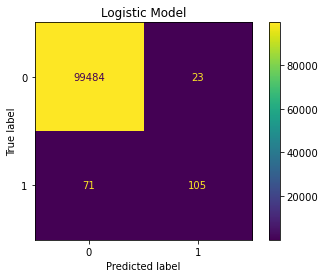

In [15]:
# Confusion matrix
metrics.plot_confusion_matrix(logistic,X_test, y_test)
plt.title('Logistic Model')
plt.show()

In [16]:
labels = ['normal', 'fraudes']

In [17]:
print(metrics.classification_report(y_test, y_pred,target_names=labels))

              precision    recall  f1-score   support

      normal       1.00      1.00      1.00     99507
     fraudes       0.82      0.60      0.69       176

    accuracy                           1.00     99683
   macro avg       0.91      0.80      0.85     99683
weighted avg       1.00      1.00      1.00     99683



In [18]:
metrics.matthews_corrcoef(y_test, y_pred)

0.6991252144077416

## 4. Logistic Regression with SMOTE over-sampling and scaling

utiliza un vecino más cercano para generar datos nuevos y sintéticos

In [19]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import scale

In [20]:
smt = SMOTE()
X_smt, y_smt = smt.fit_resample(X,y)

In [21]:
y_smt.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [23]:
# Split  train, text
X_train, X_test, y_train, y_test = train_test_split(X_smt, y_smt, test_size = .35, random_state = 500)

In [24]:
lr = LogisticRegression(C = 1e5, max_iter=500)
lr.fit(X_train, y_train)

LogisticRegression(C=100000.0, max_iter=500)

In [25]:
yhat= lr.predict(X_test)

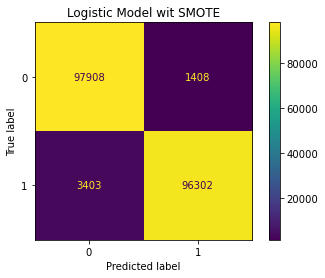

In [26]:
metrics.plot_confusion_matrix(lr,X_test, y_test)
plt.title('Logistic Model wit SMOTE')
plt.show()

In [27]:
print(metrics.classification_report(y_test, yhat,target_names=labels))

              precision    recall  f1-score   support

      normal       0.97      0.99      0.98     99316
     fraudes       0.99      0.97      0.98     99705

    accuracy                           0.98    199021
   macro avg       0.98      0.98      0.98    199021
weighted avg       0.98      0.98      0.98    199021



In [28]:
metrics.matthews_corrcoef(y_test, yhat)

0.9518463452576418

## Logist Regression with balanced class weigths 

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .35, random_state = 500)

In [38]:
y_train.value_counts()

0    184808
1       316
Name: Class, dtype: int64

In [39]:
model = LogisticRegression(C = 1e5, max_iter=500, class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(C=100000.0, class_weight='balanced', max_iter=500)

In [40]:
yhat1 = model.predict(X_test)

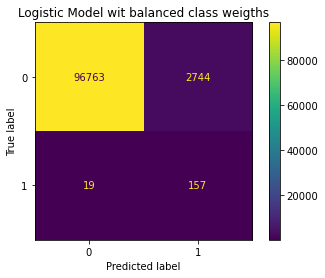

In [41]:
metrics.plot_confusion_matrix(model,X_test, y_test)
plt.title('Logistic Model wit balanced class weigths')
plt.show()

In [42]:
print(metrics.classification_report(y_test, yhat1,target_names=labels))

              precision    recall  f1-score   support

      normal       1.00      0.97      0.99     99507
     fraudes       0.05      0.89      0.10       176

    accuracy                           0.97     99683
   macro avg       0.53      0.93      0.54     99683
weighted avg       1.00      0.97      0.98     99683



In [43]:
metrics.matthews_corrcoef(y_test, yhat1)

0.21590448672528723

## Logist Regression with class weigth 

Compensar el peso de la clase desbalanceada

In [51]:
y_train.value_counts()

0    184808
1       316
Name: Class, dtype: int64

In [44]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [47]:
28315/492

57.550813008130085

In [48]:
class_weigth = {1:57.55}

In [52]:
lr_1 = LogisticRegression(C = 1e5, max_iter=500, class_weight=class_weigth)
lr_1.fit(X_train, y_train)
lr_pred = lr_1.predict(X_test)

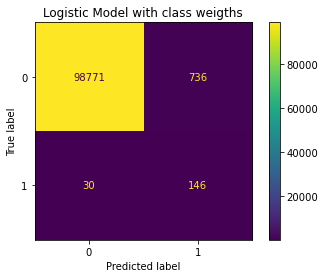

In [63]:
metrics.plot_confusion_matrix(lr_1,X_test, y_test)
plt.title('Logistic Model with class weigths')
plt.show()

In [54]:
print(metrics.classification_report(y_test, lr_pred,target_names=labels))

              precision    recall  f1-score   support

      normal       1.00      0.99      1.00     99507
     fraudes       0.17      0.83      0.28       176

    accuracy                           0.99     99683
   macro avg       0.58      0.91      0.64     99683
weighted avg       1.00      0.99      0.99     99683



In [55]:
metrics.matthews_corrcoef(y_test, lr_pred)

0.36856892448449596

## Logist Regression with undersampling

In [56]:
from imblearn.under_sampling import RandomUnderSampler

In [59]:
rus = RandomUnderSampler(random_state=1)
X_rus, y_rus = rus.fit_resample(X,y)

In [60]:
y_rus.value_counts()

0    492
1    492
Name: Class, dtype: int64

In [61]:
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus)

In [62]:
lr_rus = LogisticRegression(C = 1e5, max_iter=500)
lr_rus.fit(X_train_rus, y_train_rus)
rus_pred = lr_rus.predict(X_test_rus)

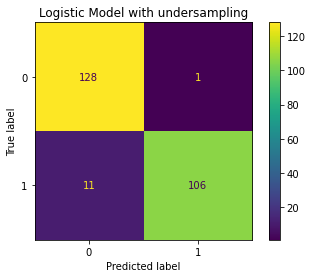

In [65]:
metrics.plot_confusion_matrix(lr_rus,X_test_rus, y_test_rus)
plt.title('Logistic Model with undersampling')
plt.show()

In [66]:
print(metrics.classification_report(y_test_rus, rus_pred,target_names=labels))

              precision    recall  f1-score   support

      normal       0.92      0.99      0.96       129
     fraudes       0.99      0.91      0.95       117

    accuracy                           0.95       246
   macro avg       0.96      0.95      0.95       246
weighted avg       0.95      0.95      0.95       246



In [67]:
metrics.matthews_corrcoef(y_test_rus, rus_pred)

0.9048498548433441